In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Load the Wine dataset (you can replace it with any other dataset)
wine = datasets.load_wine()
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']], columns= np.append(wine['feature_names'], 'target'))


In [3]:
# For simplicity, we will use only two features (you can change this as needed)
X = data[['alcohol', 'flavanoids']]
y = data['target']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Preprocessing: Standardize the data (important for Elastic Net Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Create and train the Elastic Net Regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters based on your requirement
model.fit(X_train_scaled, y_train)

ElasticNet()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.4775466792556176


In [9]:
# Cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation Scores: {cross_val_scores}')
print(f'Mean Cross-validation Score: {np.mean(cross_val_scores)}')


Cross-validation Scores: [0.19204606 0.09616566 0.18660278 0.16388753 0.20928617]
Mean Cross-validation Score: 0.16959763899830324


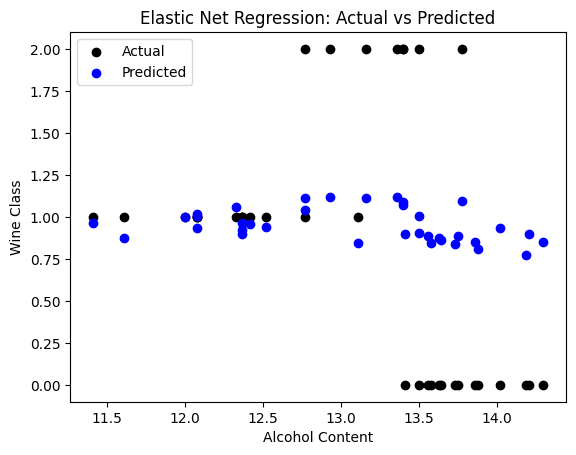

In [10]:
# Visualization
plt.scatter(X_test['alcohol'], y_test, color='black', label='Actual')
plt.scatter(X_test['alcohol'], y_pred, color='blue', label='Predicted')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Class')
plt.legend()
plt.title('Elastic Net Regression: Actual vs Predicted')
plt.show()